In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

df = pd.read_csv('data/BTC-USD.csv')
df = df[['Date', 'Close']]
df.rename(columns={'Close': 'value', 'Date': 'date'}, inplace=True)
df = df.set_index('date')
print(df.head())



                 value
date                  
2014-09-17  457.334015
2014-09-18  424.440002
2014-09-19  394.795990
2014-09-20  408.903992
2014-09-21  398.821014


TODO:
1. Create basic model with alpha = 0.1 -- DONE 
2. experiment with different alpha values (.1 vs .4)
3. additive or multiplicative 

alpha - how much importance model will allocate to most recent observation. 

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
def triple_exp_smoothing(df, alpha, beta, gamma, n_preds):
  """
    Perform triple exponential smoothing on a pandas dataframe
    using the Holt-Winters method.
    """
  # Split the dataframe into training and testing sets
  train = df.iloc[:-n_preds]
  test = df.iloc[-n_preds:]
  # Fit the model on the training data
  model = ExponentialSmoothing(train, freq='D',
                               trend='add',
                               seasonal='add',
                               seasonal_periods=12).fit(
                                 smoothing_level=alpha,
                                 smoothing_trend=beta,
                                 smoothing_seasonal=gamma)
  # Make predictions on the test data (n_preds-out-of-sample-points)
  preds = model.forecast(n_preds)
  # Concatenate the train and predicted data
  result = pd.concat([train, preds])
  return result

# Specify the smoothing parameters
alpha = 0.1
beta = 0.1
gamma = 0.9
n_preds = 180

result = triple_exp_smoothing(df, alpha, beta, gamma, n_preds)
result.drop(columns='value', inplace=True)
result.rename(columns={0:"value"}, inplace=True)
result.reset_index(inplace=True)
result.dropna(inplace=True)
result.rename(columns={"index":"date"}, inplace=True)
result["date"]= result["date"].dt.date
result.set_index('date')
result



c:\Users\VVV\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,date,value
3159,2023-05-12,29380.616664
3160,2023-05-13,28127.951441
3161,2023-05-14,28525.887582
3162,2023-05-15,28546.866906
3163,2023-05-16,28178.803907
3164,2023-05-17,28597.859219
3165,2023-05-18,27790.159517
3166,2023-05-19,27312.786743
3167,2023-05-20,26635.695433
3168,2023-05-21,26799.727956


In [6]:
result_alpha4 = triple_exp_smoothing(df, .4, beta, gamma, n_preds)
result_alpha4.drop(columns='value', inplace=True)
result_alpha4.rename(columns={0:"value"}, inplace=True)
result_alpha4.reset_index(inplace=True)
result_alpha4.dropna(inplace=True)
result_alpha4.rename(columns={"index":"date"}, inplace=True)
#result_alpha4["date"]= result["date"].dt.date
result_alpha4.set_index('date')
result_alpha4

,date,value
3159,2023-05-12 00:00:00,24969.071045
3160,2023-05-13 00:00:00,22841.615087
3161,2023-05-14 00:00:00,22370.342277
3162,2023-05-15 00:00:00,21690.198756
3163,2023-05-16 00:00:00,20945.388453
3164,2023-05-17 00:00:00,21943.423189
3165,2023-05-18 00:00:00,21783.311843
3166,2023-05-19 00:00:00,22311.694115
3167,2023-05-20 00:00:00,22782.781999
3168,2023-05-21 00:00:00,23812.729767


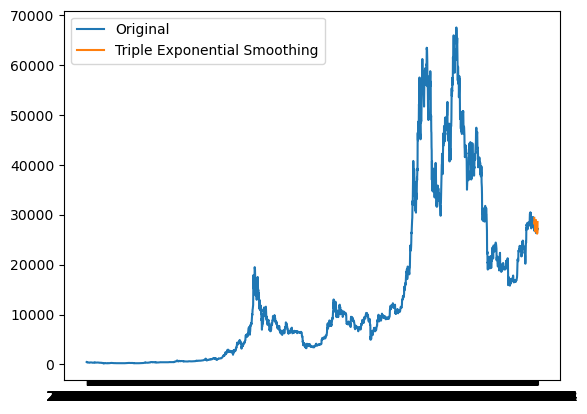

In [72]:
# Plot the result
# plt.plot(df.index, df['value'], label='Original')
# plt.plot(result.index, result["value"], label='Triple Exponential Smoothing')
# plt.legend(loc='best')
# plt.show()

In [7]:
#use plotly so we can zoom in
trace1 = go.Scatter(x=df.reset_index()['date'], y=df['value'], mode='lines', name='Actual Price')
trace2 = go.Scatter(x=result.reset_index()['date'], y=result['value'], mode='lines', name='Alpha=.1')
trace3 = go.Scatter(x=result_alpha4.reset_index()['date'], y=result_alpha4['value'], mode='lines', name='Alpha=.4')

data = [trace1, trace2, trace3]
layout = go.Layout(title='Combined Data Plot')
fig = go.Figure(data=data, layout=layout)
fig.show()

high alpha value of .4 causes forecast to be way off